Author: Lynn Menchaca

Date: 06Jan2024

Project: Tesla Stock EDA


Resources:

- Youtube: Krish Naik - Time Series Live Lectures
    - https://www.youtube.com/playlist?list=PLZoTAELRMXVNty3jyJkYXuyQY3lMSpr3b
- "Resample function of Pandas" by Saloni Mishra
    - https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78
    

In [1]:
## Install Pandas Data Reader
# pip install pandas-datareader

Padas Datareader is a python pacakge taht allow the user to create a pandas DataFrame object by using various data sources from teh internet. (Yahoo Finance, Google Finance, Morningstar, IEX, Robinhood, ect.)

In [2]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Tesla stock code = TSLA

# get_data_yahoo -> gives errors becuase Yahoo made changes to their API
#pdr.get_data_yahoo('TSLA')

df_tesla = pdr.get_data_stooq('TSLA')

In [4]:
df_tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-06,103.00,114.39,101.8100,113.06,220911051
2023-01-05,110.51,111.75,107.1601,110.34,157986324
2023-01-04,109.11,114.59,107.5200,113.64,180388976
2023-01-03,118.47,118.80,104.6400,108.10,231402818
2022-12-30,119.95,124.48,119.7500,123.18,157777339


<AxesSubplot:xlabel='Date'>

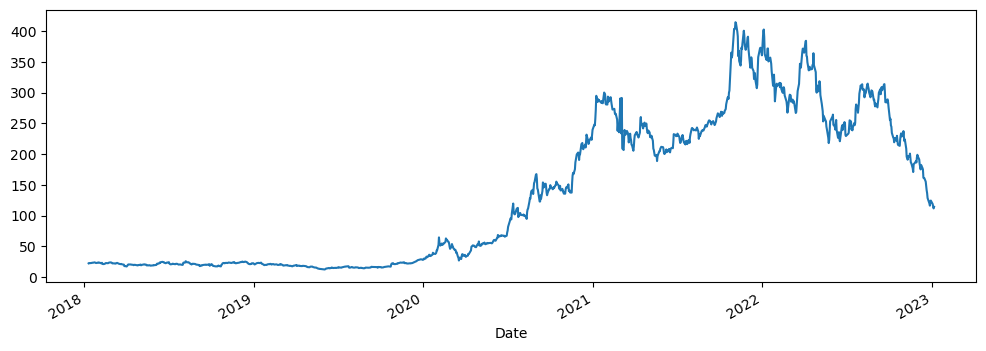

In [5]:
# Plotting the high values of each day of Tesla stock
#figsize = (width,height)

df_tesla['High'].plot(figsize=(12,4))

<AxesSubplot:xlabel='Date'>

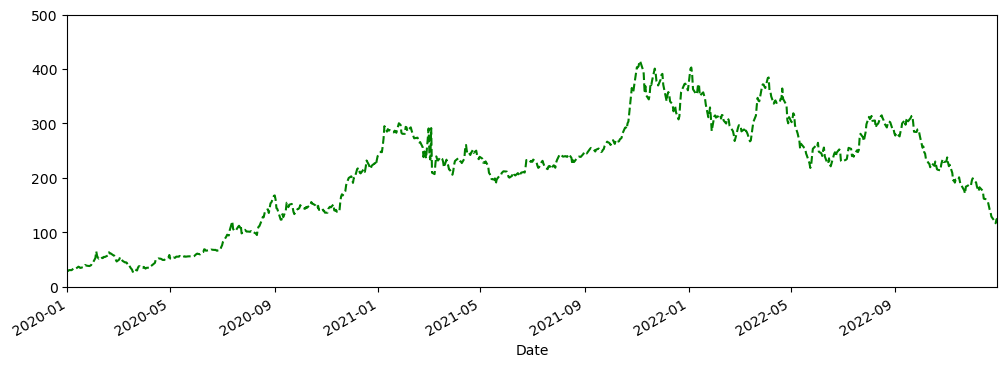

In [6]:
# Focusing on just a section of the plot with xlimit and ylimit
#playing with line style and color
start_date = '2020-01-01'
end_date = '2022-12-30'

df_tesla['High'].plot(xlim=[start_date, end_date], ylim=[0,500], figsize=(12,4), ls='--',c='green')

In [7]:
#provide dates

df_tesla.index

DatetimeIndex(['2023-01-06', '2023-01-05', '2023-01-04', '2023-01-03',
               '2022-12-30', '2022-12-29', '2022-12-28', '2022-12-27',
               '2022-12-23', '2022-12-22',
               ...
               '2018-01-24', '2018-01-23', '2018-01-22', '2018-01-19',
               '2018-01-18', '2018-01-17', '2018-01-16', '2018-01-12',
               '2018-01-11', '2018-01-10'],
              dtype='datetime64[ns]', name='Date', length=1257, freq=None)

In [8]:
#looking at just the last 4 dates

df_tesla.iloc[0:4]
#df_tesla.loc['2022-12-30':'2023-01-05']

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-06,103.00,114.39,101.8100,113.06,220911051
2023-01-05,110.51,111.75,107.1601,110.34,157986324
2023-01-04,109.11,114.59,107.5200,113.64,180388976
2023-01-03,118.47,118.80,104.6400,108.10,231402818


In [9]:
#index values for a range of dates
#date values are the index
#looking at opening stock values for the date range

index = df_tesla.loc['2020-01-01':'2023-01-05'].index

share_open = df_tesla.loc['2020-01-01':'2023-01-05']['Open']

/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1231/748256350.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  index = df_tesla.loc['2020-01-01':'2023-01-05'].index
/var/folders/t3/m14fghtd0fs5gl_s5tzd3h500000gn/T/ipykernel_1231/748256350.py:7: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  share_open = df_tesla.loc['2020-01-01':'2023-01-05']['Open']


In [10]:
#looking at the opening stock values

share_open.head(10)

Date
2023-01-05    110.510
2023-01-04    109.110
2023-01-03    118.470
2022-12-30    119.950
2022-12-29    120.385
2022-12-28    110.350
2022-12-27    117.495
2022-12-23    126.370
2022-12-22    136.000
2022-12-21    139.335
Name: Open, dtype: float64

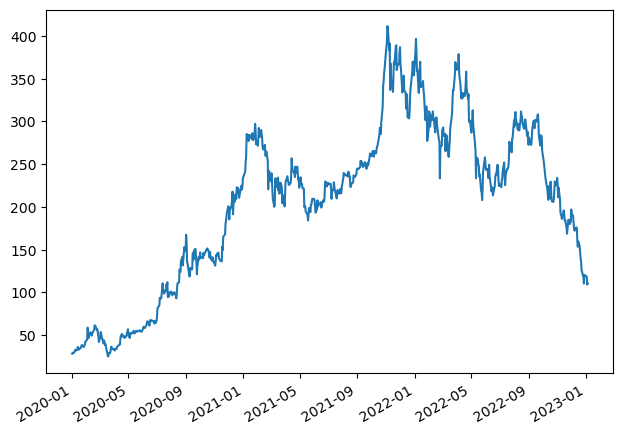

In [11]:
# subplots

figure, axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate() #used to prevent overlapping of the x-axis tick marks
axis.plot(index, share_open)

In [12]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2023-01-06 to 2018-01-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [13]:
## move datetime from index to column

df_tesla = df_tesla.reset_index()
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1257 non-null   datetime64[ns]
 1   Open    1257 non-null   float64       
 2   High    1257 non-null   float64       
 3   Low     1257 non-null   float64       
 4   Close   1257 non-null   float64       
 5   Volume  1257 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.0 KB


In [14]:
#Use if the date column is not already in the datetime format

pd.to_datetime(df_tesla['Date'])

0      2023-01-06
1      2023-01-05
2      2023-01-04
3      2023-01-03
4      2022-12-30
          ...    
1252   2018-01-17
1253   2018-01-16
1254   2018-01-12
1255   2018-01-11
1256   2018-01-10
Name: Date, Length: 1257, dtype: datetime64[ns]

In [15]:
# To turn the Date column back in to the index
# drop=True will drop the Date column

df_tesla = df_tesla.set_index('Date', drop=True)
df_tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-06,103.00,114.39,101.8100,113.06,220911051
2023-01-05,110.51,111.75,107.1601,110.34,157986324
2023-01-04,109.11,114.59,107.5200,113.64,180388976
2023-01-03,118.47,118.80,104.6400,108.10,231402818
2022-12-30,119.95,124.48,119.7500,123.18,157777339


In [16]:
# playing with the datetime data
# Format -> datetime(year,month,day,hour,min,second,millisecond)

print(datetime(2023,1,5))
print(datetime.now())

date = datetime(2023,1,5)
print('Day: ', date.day)
print('Weekday: ', date.weekday())
print('Hour: ', date.hour)

2023-01-05 00:00:00
2023-01-09 08:42:04.462473
Day:  5
Weekday:  3
Hour:  0



## Time Resampling


In [17]:
df_tesla.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-06,103.00,114.39,101.8100,113.06,220911051
2023-01-05,110.51,111.75,107.1601,110.34,157986324
2023-01-04,109.11,114.59,107.5200,113.64,180388976
2023-01-03,118.47,118.80,104.6400,108.10,231402818
2022-12-30,119.95,124.48,119.7500,123.18,157777339


In [18]:
#Resamplin is used for frequency conversion and resampling of time series.
# Example below is changing the data from daily to yearly
# Rule - date offset
# Rule 'A' - year end frequency (end of the year data)
# .min() is taking the min value for the entire year

df_tesla.resample(rule='A').min()

,Open,High,Low,Close,Volume
Date,,,,,
2018-12-31,16.8520,17.3553,16.3060,16.7040,46210860
2019-12-31,12.0733,12.4453,11.7993,11.9313,36984435
2020-12-31,24.9797,26.9907,23.3673,24.0813,52073166
2021-12-31,184.1830,188.7370,179.8300,187.6670,29401674
2022-12-31,110.3500,116.2700,108.2400,109.1000,41864742
2023-12-31,103.0000,111.7500,101.8100,108.1000,157986324


<AxesSubplot:xlabel='Date'>

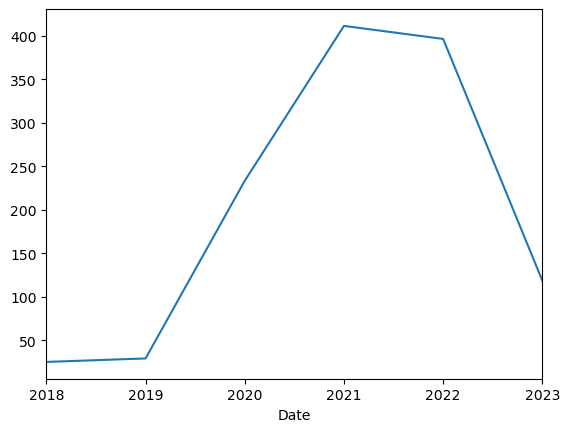

In [19]:
#ploting the jump in price from 2020 to 2021

df_tesla.resample(rule='A').max()['Open'].plot()

<AxesSubplot:xlabel='Date'>

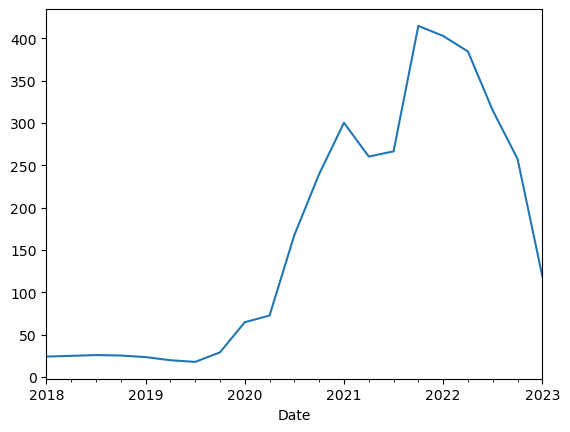

In [20]:
#quarterly start frequency
#Resource:
#https://towardsdatascience.com/resample-function-of-pandas-79b17ec82a78

#Looking at the large jump in more detail
df_tesla.resample(rule='QS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

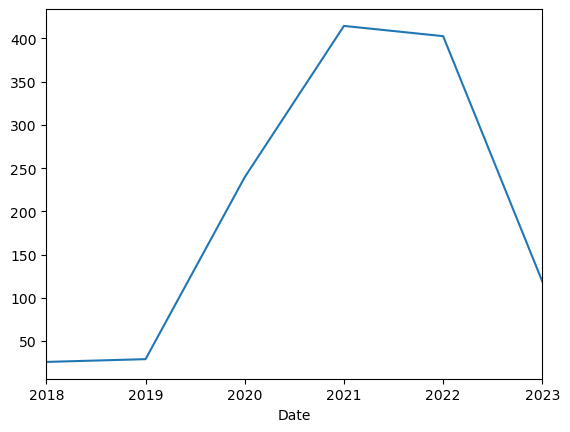

In [21]:
#Business End Frequency

#df_tesla.resample(rule='BA').max()
df_tesla.resample(rule='BA').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

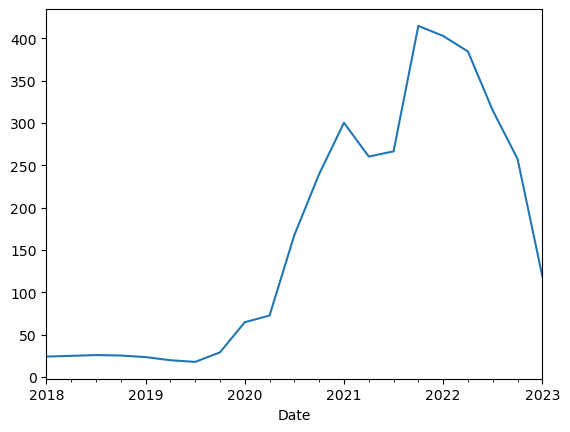

In [22]:
#Business Quarters

df_tesla.resample(rule='BQS').max()['High'].plot()

<AxesSubplot:xlabel='Date'>

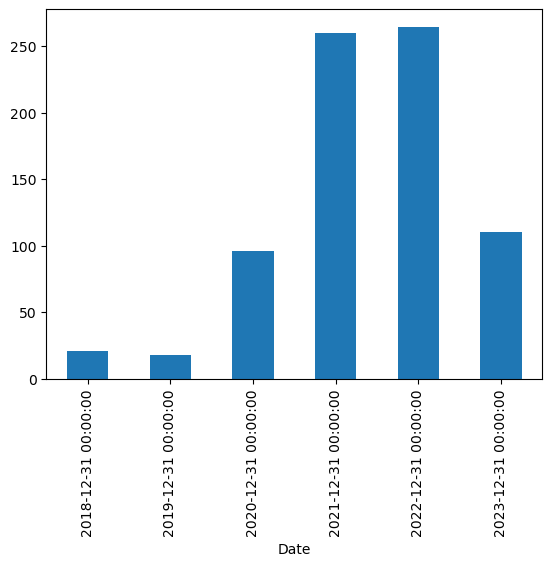

In [23]:
# Bar Plot

df_tesla['Open'].resample(rule='A').mean().plot(kind='bar')

<AxesSubplot:xlabel='Date'>

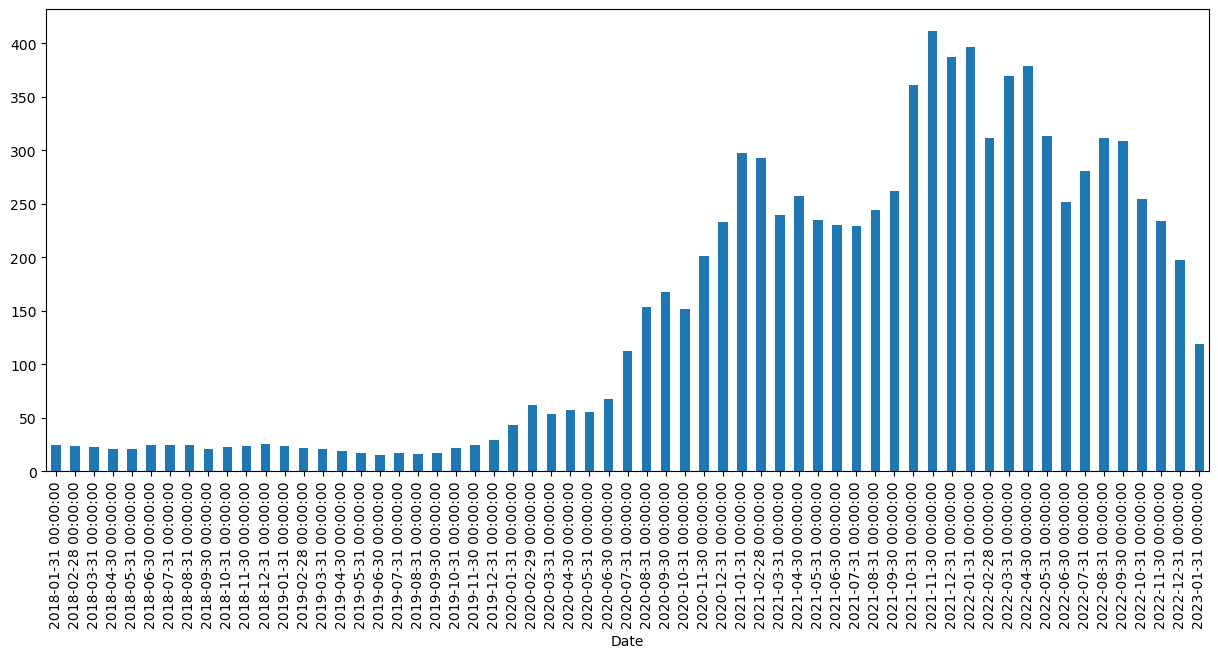

In [24]:
#Monthly data

df_tesla['Open'].resample(rule='M').max().plot(kind='bar', figsize=(15,6))

In [25]:
#rolling(#number of rows)

df_tesla['High'].rolling(10).mean().head(15)

Date
2023-01-06          NaN
2023-01-05          NaN
2023-01-04          NaN
2023-01-03          NaN
2022-12-30          NaN
2022-12-29          NaN
2022-12-28          NaN
2022-12-27          NaN
2022-12-23          NaN
2022-12-22    120.87673
2022-12-21    123.56373
2022-12-20    127.23573
2022-12-19    131.30173
2022-12-16    135.52073
2022-12-15    139.16572
Name: High, dtype: float64

In [26]:
df_tesla['High'].head(15)

Date
2023-01-06    114.3900
2023-01-05    111.7500
2023-01-04    114.5900
2023-01-03    118.8000
2022-12-30    124.4800
2022-12-29    123.5700
2022-12-28    116.2700
2022-12-27    119.6700
2022-12-23    128.6173
2022-12-22    136.6300
2022-12-21    141.2600
2022-12-20    148.4700
2022-12-19    155.2500
2022-12-16    160.9900
2022-12-15    160.9299
Name: High, dtype: float64

In [27]:
# Rolling average of 30 days

df_tesla['Open:30 days rolling'] = df_tesla['Open'].rolling(30).mean()

df_tesla.iloc[25:35]

,Open,High,Low,Close,Volume,Open:30 days rolling
Date,,,,,,
2022-11-30,182.43,194.76,180.6301,194.70,109186404,NaN
2022-11-29,184.99,186.38,178.7500,180.83,83357111,NaN
2022-11-28,179.96,188.50,179.0000,182.92,93038148,NaN
2022-11-25,185.06,185.20,180.6300,182.86,50672739,NaN
2022-11-23,173.57,183.62,172.5000,183.20,109536709,154.030500
2022-11-22,168.63,170.92,166.1850,169.91,78452327,156.218167
2022-11-21,175.85,176.77,167.5400,167.87,92882712,158.396167
2022-11-18,185.05,185.19,176.5500,180.19,76048866,160.927500
2022-11-17,183.96,186.16,180.9000,183.17,64335970,163.110500


<AxesSubplot:xlabel='Date'>

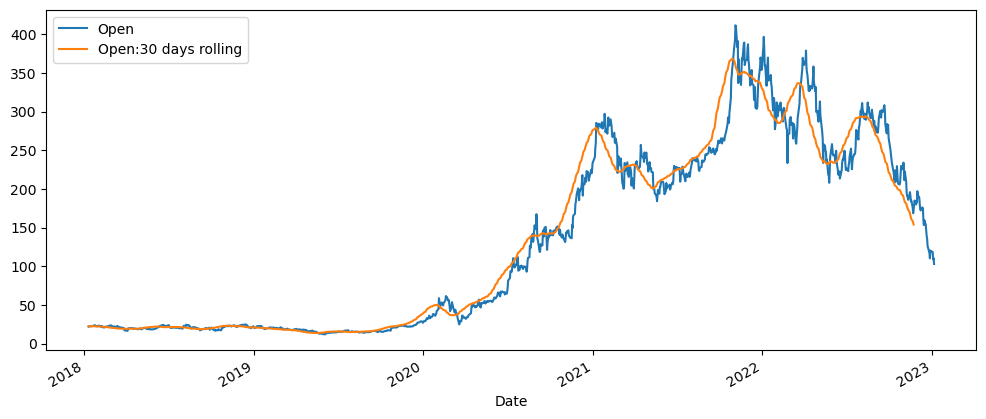

In [28]:
#plotting the 30 days rolling open value with the original open value
#the rolling smooths out the open values

df_tesla[['Open','Open:30 days rolling']].plot(figsize=(12,5))

#### Assignment - Day 1

1. Read the Microsoft Data using Pandas Data reader
2. Get the maximum price of the share from 2017 to 2022
3. Which is the date of the highest price of the stock?
4. Which is the date of the lowest price of the stock?


### Various Averge Formulas

- Simple Moving Average
- Commulative Moving Average
- Exponential Weight Moving Average
- Moving Average -> ACF [Auto Correlation Formula]
- Autoregression Model -> PACF [Partial Auto Correlation Formula]


In [29]:
df_tesla.head()

,Open,High,Low,Close,Volume,Open:30 days rolling
Date,,,,,,
2023-01-06,103.00,114.39,101.8100,113.06,220911051,NaN
2023-01-05,110.51,111.75,107.1601,110.34,157986324,NaN
2023-01-04,109.11,114.59,107.5200,113.64,180388976,NaN
2023-01-03,118.47,118.80,104.6400,108.10,231402818,NaN
2022-12-30,119.95,124.48,119.7500,123.18,157777339,NaN


<AxesSubplot:xlabel='Date'>

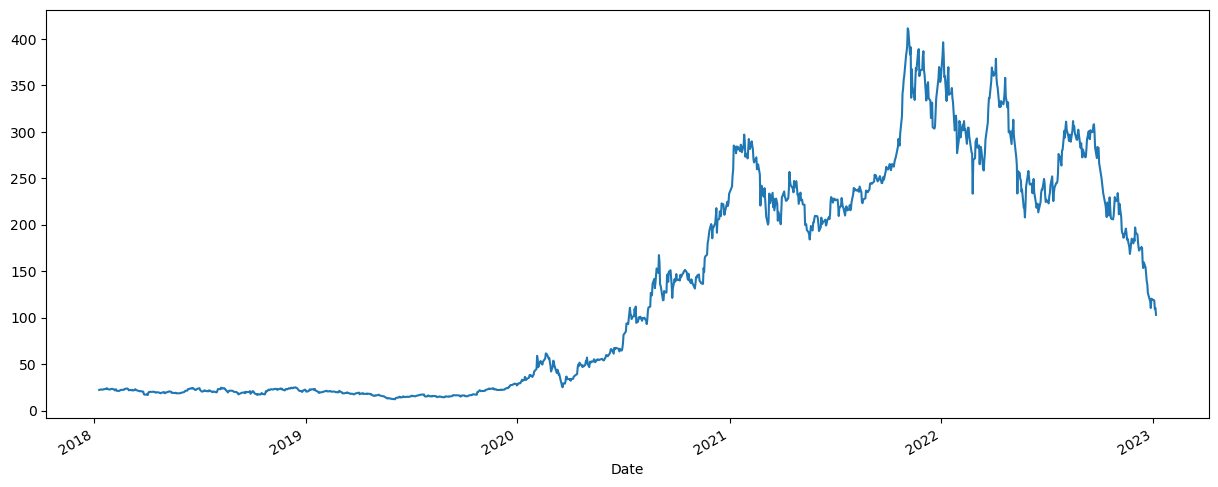

In [30]:
df_tesla['Open'].plot(figsize=(15,6))

In [31]:
#Simple Moving Average
# with min_periods = 1 -> you get no nan values

df_tesla['Open:10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla[['Open','Open:10 days rolling']].head()

,Open,Open:10 days rolling
Date,,
2023-01-06,103.00,103.0000
2023-01-05,110.51,106.7550
2023-01-04,109.11,107.5400
2023-01-03,118.47,110.2725
2022-12-30,119.95,112.2080


<AxesSubplot:xlabel='Date'>

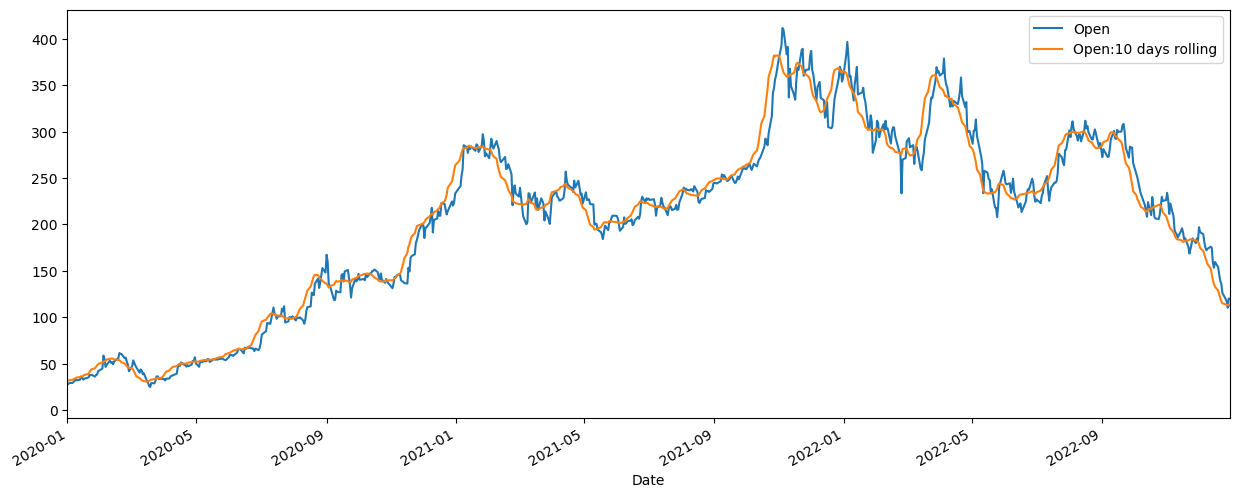

In [32]:
#Plot comparing Open and the 10 days rolling Open

start_date = '2020-01-01'
end_date = '2022-12-30'

df_tesla[['Open','Open:10 days rolling']].plot(xlim=[start_date, end_date],figsize=(15,6))

In [33]:
df_tesla['Open:20 days rolling'] = df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open:50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

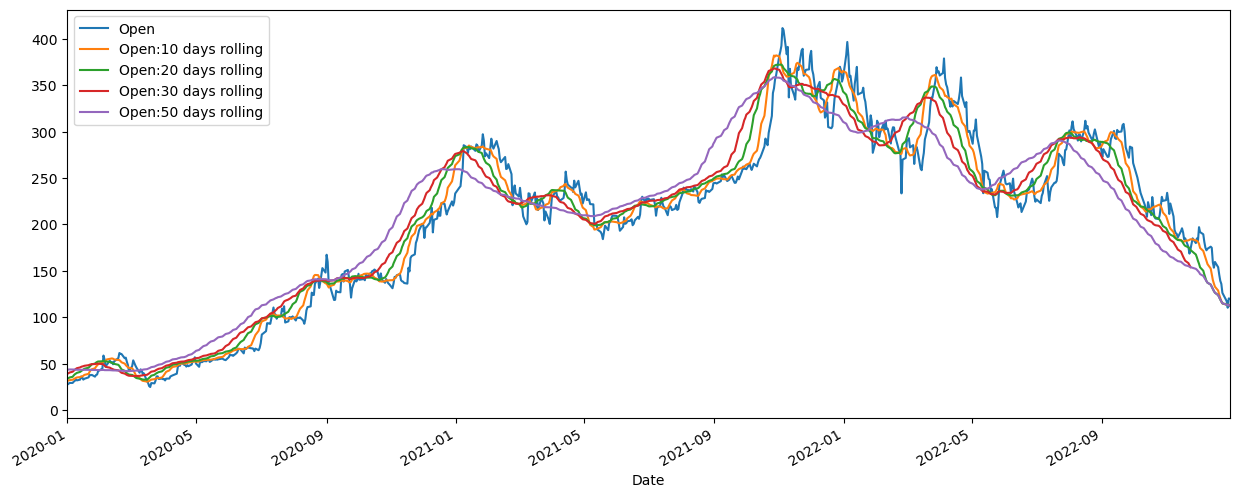

In [34]:
df_tesla[['Open','Open:10 days rolling','Open:20 days rolling','Open:30 days rolling','Open:50 days rolling']].plot(xlim=[start_date, end_date],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

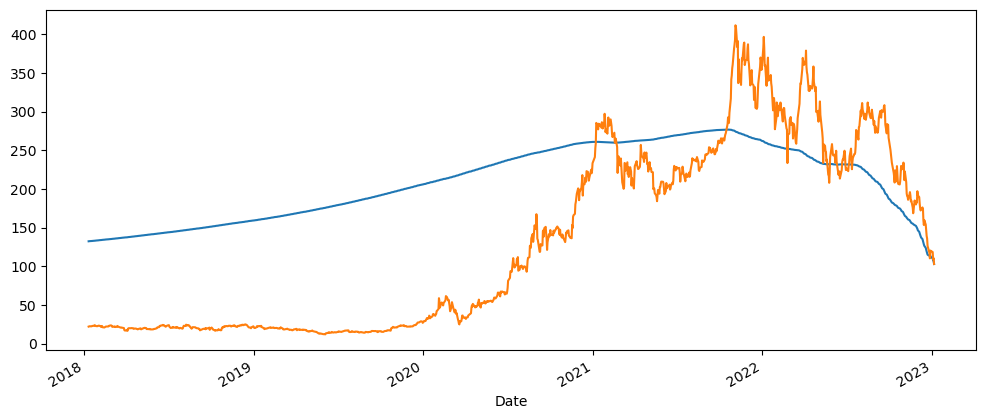

In [35]:
#Cummulative Moving Average (CMA)
# Expanding function in python

df_tesla['Open'].expanding().mean().plot(figsize=(12,5))
df_tesla['Open'].plot(figsize=(12,5))

In [37]:
# Exponential Moving Average (EMA)
# smoothing factor - 0.1

df_tesla['ema_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

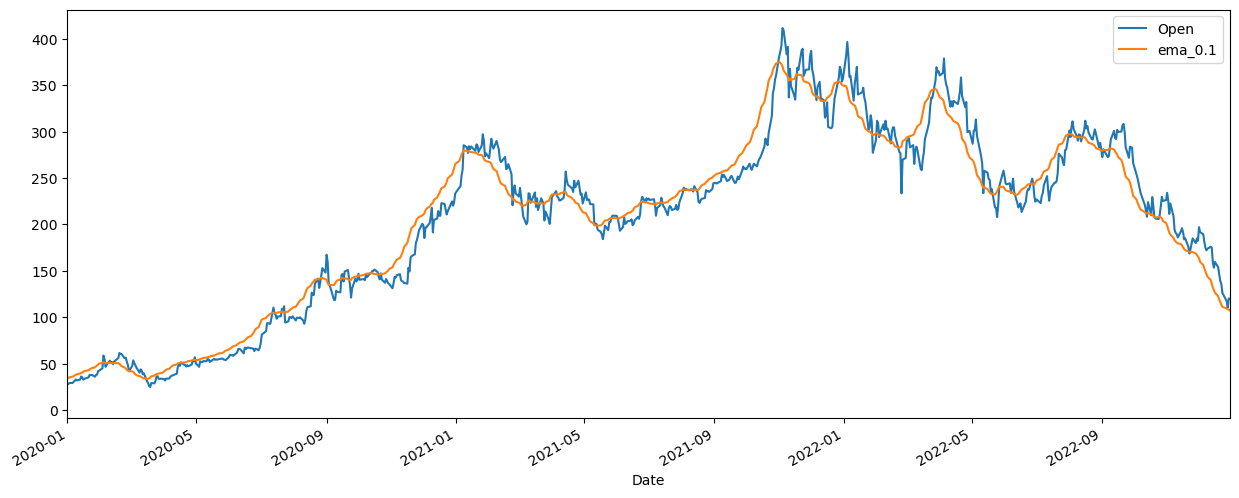

In [38]:
# compaing the smoothing of the EMA Open to the original Open

df_tesla[['Open','ema_0.1']].plot(xlim=[start_date, end_date],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

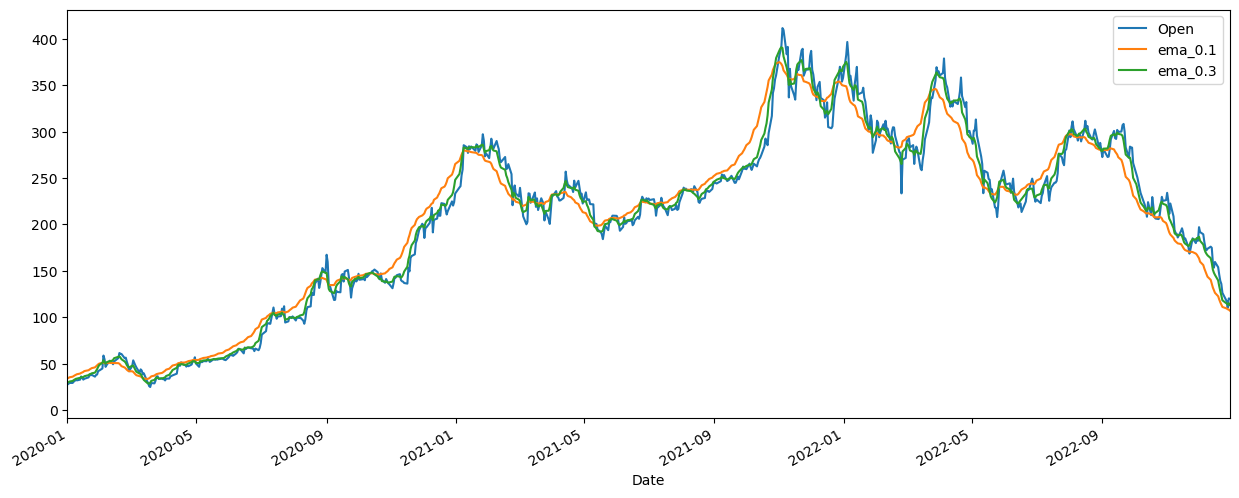

In [39]:
#Playing with the smoothing factor

df_tesla['ema_0.3'] = df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()

df_tesla[['Open','ema_0.1','ema_0.3']].plot(xlim=[start_date, end_date],figsize=(15,6))


The greater the alpha value is the closer the EMA values will be to the original plot. No one set value have to try with multiple values.


In [40]:
# Exponential Weighted Moving Average (EWMA)
#putting weight to the recent data verse the older data
#weighted value is the span
# span is the multiplier in the EWMA equation

df_tesla['ewma_5day'] = df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

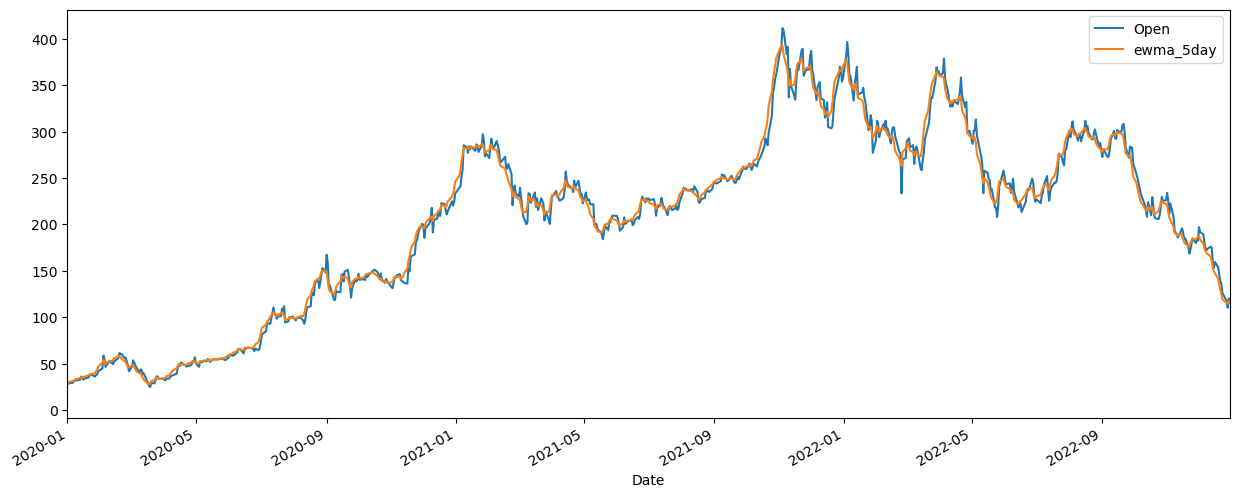

In [41]:
df_tesla[['Open','ewma_5day']].plot(xlim=[start_date, end_date],figsize=(15,6))

<AxesSubplot:xlabel='Date'>

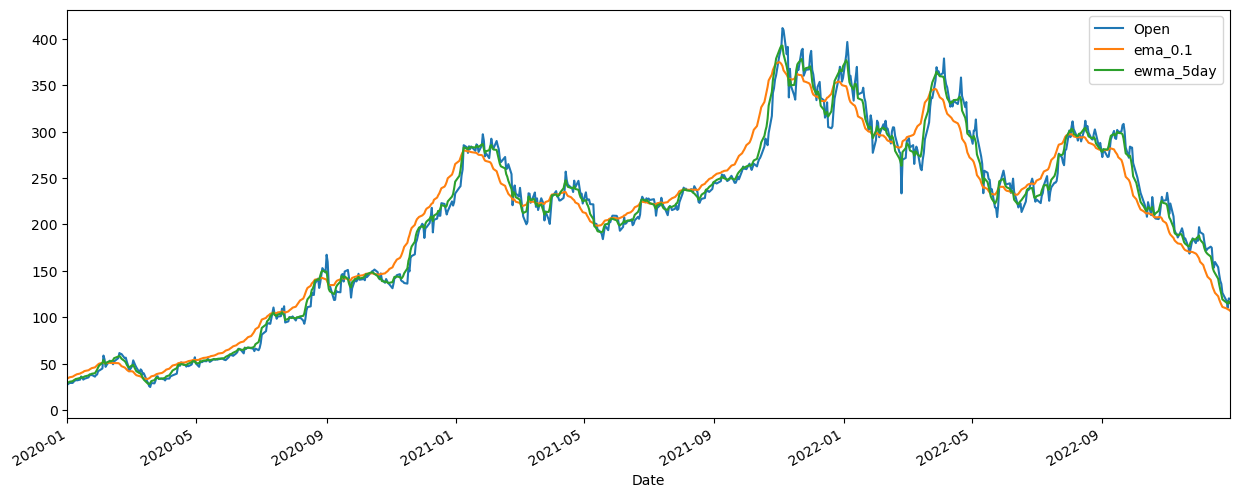

In [43]:
#comparing open, EMA, EWMA
#The values are very close for alpha 0.3 and span 5

df_tesla[['Open','ema_0.1','ewma_5day']].plot(xlim=[start_date, end_date],figsize=(15,6))